<h2 style="color: green; text-align: center; font-weight: bold;">Post class assignment</h2>

# Introduction

#### XYZ Bank - Term Deposit Subscription Prediction
* You are a data scientist at XYZ Bank, tasked with helping the bank increase the success rate of its term deposit campaigns. In the previous campaigns, the bank noticed that only a small fraction of customers subscribed to term deposits, and now they want to use data science to predict which customers are likely to subscribe.

<center><img src="https://dcbtehri.co.in/wp-content/uploads/2020/05/FD1.jpg"/></center>

* You’ve been provided with a dataset that includes information about customer demographics, financial behavior, and previous campaign contact history. Your task is to evaluate different machine learning models and help the bank efficiently target potential customers for their term deposit marketing efforts.

# Step 1: Import the neccessary libraries

In [ ]:
# Import the necessary libraries(numpy, pandas, matplotlib, seaborn)
# Data manipulation and numerical operations

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Setting maximum limit of the number of columns visible
pd.set_option('display.max_columns', 30)

# Step 2: Load the data


### The dataset contains 16 features and a target as shown below:
1. `age`: The customer's age.
2. `job`: The type of job the customer has.
3. `marital`: The marital status of the customer.
4. `education`: The customer's level of education.
5. `default`: Whether the customer has credit in default.
6. `balance`: The average yearly balance in euros.
7. `housing`: Whether the customer has a housing loan.
8. `loan`: Whether the customer has a personal loan.
9. `contact`: The type of communication contact
10. `day`: The last contact day of the month.
11. `month`: The last contact month of the year.
12. `duration`: The last contact duration in seconds.
13. `campaign`: Number of contacts performed during this campaign.
14. `pdays`: Number of days since the client was last contacted.
15. `previous`: Number of contacts before this campaign.
16. `poutcome`: Outcome of the previous marketing campaign.
17. `y`: Whether the customer subscribed to the term deposit (yes/no).


### 2.1 Load the data & view it


Hint: Use ; as the seperator.

In [ ]:
# Loading the data
# Read the csv file using a seperator ";"
data = pd.read_csv('bank-full.csv', sep=';')

# Viewing the data
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 2.2 View the columns of the data and understand them

In [ ]:
# View the columns of the dataset
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### 2.3 Check the shape of the dataset

In [ ]:
# Checking the shape of the data
data.shape

(45211, 17)

### 2.4 Understand the datatypes of each of the columns

In [ ]:
# Check the dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Observation:**
The dataset contains columns with `int64` and `object` data types, and all rows are filled with non-null values.

### 2.5 Get a summary of the dataset using the describe method.

In [ ]:
# Get a statistical summary of the dataset
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# STEP 3: EDA



### 3.1  Check the value counts of the target variable y in the dataset

A common problem in binary classification tasks is data imbalance, where one class significantly outnumbers the other. In this question, you need to check whether the target variable y (whether the customer subscribed to a term deposit) is imbalanced in the dataset.

In [ ]:
# Check the value counts in target column
data['y'].value_counts()

,count
y,
no,39922
yes,5289


### 3.2 Plot the distribution of the value counts for the target variable y

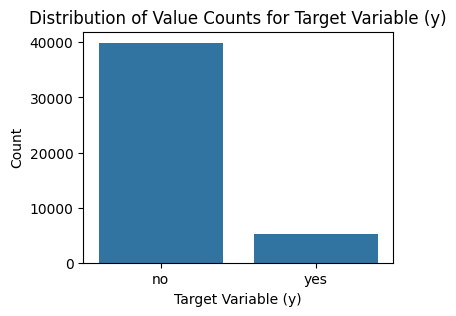

In [ ]:
# Get the value counts of 'y'
y_counts = data['y'].value_counts()

# Plot the distribution
plt.figure(figsize=(4,3))
sns.barplot(x=y_counts.index, y=y_counts.values)
plt.xlabel('Target Variable (y)')
plt.ylabel('Count')
plt.title('Distribution of Value Counts for Target Variable (y)')
plt.show()

### 3.3 Plot a pie chart to visualize the distribution of the target variable y, including the percentages of each category

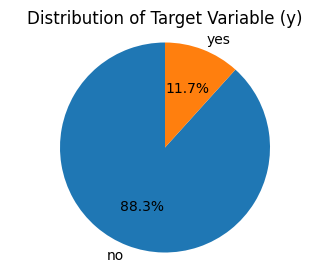

In [ ]:
# Get the value counts of 'y'
y_counts = data['y'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 3))
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable (y)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

Observation:

* The dataset is highly imbalanced, with the majority of the target variable y being "no" (39,922 instances), compared to "yes" (5,289 instances).
* Approximately 88.4% of the entries are "no," and only 11.6% are "yes."
* This imbalance suggests that the dataset is dominated by negative outcomes (no), which could affect the performance of certain machine learning models if not addressed.

### 3.4 Why do you think classs imabalnce is a problem, and list down your ideas on addressing the class imbalance?

Class imbalance leads to biased models that tend to favor the majority class, resulting in poor performance on the minority class. It also causes misleading accuracy, making precision, recall, and F1-score more appropriate metrics. To address it, techniques like resampling, class weighting, and threshold tuning can be used, along with ensemble methods and anomaly detection approaches.

### 3.5 For this problem what do you think is a good performance metric, precision, recall, f1-score or all of them? justify your answer.

Explanation:
* In this case, predicting a potential loan-taker as non-loan taker, i.e., False Negative results in loss of revenue to the bank.
* However, predicting a non-loan taker as loan-taker, i.e., False Negatives, and to continuosly target such uninterested/non-potential customers would negatively impact the overall customer experience while it additionally adds upto the marketing spend.
* Therefore, while recall is important, it should be balanced wtih precision too. Hence, Recall, along with F1 Score are good reliable metrics for the given problem statement.

# Step 4:  Data Preprocessing

### 4.1 Check for any duplicate rows in the dataset.

In [ ]:
# Check for duplicate row
data.duplicated().sum()

0

Observation: There are no duplicate rows in the dataset

### 4.2 Check the Null values


In [ ]:
# Check for missing values in the dataset
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Observation: There are no null values present in the data.

From our previous analysis, we found that there are no null or duplicate values in the data. Therefore, we are ready to proceed with model building.

### 4.3 Split the data into train and test

In [ ]:
# Assuming X and y are your features and target variable
# Split the data into 80% train and 20% test, stratifying by the target variable (y)
X = data.drop(['y'],axis=1)
y = data.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)


### 4.4 Seperate the numerical and catergorical columns for both train and test sets

In [ ]:
# Divide the dataset into numerical and categorical columns
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']  # Numerical columns
categorical_columns = list(set(train_data.columns) - set(numerical_columns) - {'y'})  # All remaining columns except the target

# Separate numerical and categorical columns for train and test data
train_numerical = X_train[numerical_columns]
test_numerical = X_test[numerical_columns]

train_categorical = X_train[categorical_columns]
test_categorical = X_test[categorical_columns]


### 4.5 Standardize the numerical columns using StandardScaler()

In [ ]:
# Apply StandardScaler to numerical columns in train and test data
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler on train data (fit and transform)
scaler = StandardScaler()
train_numerical_scaled = scaler.fit_transform(train_numerical)

# Apply the scaler on test data (transform only)
test_numerical_scaled = scaler.transform(test_numerical)
print(train_numerical_scaled.shape, test_numerical_scaled.shape)

(36168, 6) (9043, 6)


### 4.6 Encode the categorical columns using OneHotEncoder

In [ ]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoder on train data (fit and transform)
encoder = OneHotEncoder(sparse_output=False, drop='first')
train_categorical_encoded = encoder.fit_transform(train_categorical)

# Apply the encoder on test data (transform only)
test_categorical_encoded = encoder.transform(test_categorical)
print(train_categorical_encoded.shape, test_categorical_encoded.shape)

(36168, 65) (9043, 65)


### 4.7 Combine the both numerical and categorical columns

In [ ]:
# Combine numerical and categorical columns in train and test data
train_final = np.hstack([train_numerical_scaled, train_categorical_encoded])
test_final = np.hstack([test_numerical_scaled, test_categorical_encoded])

# Convert the final train and test sets to DataFrames
X_train = pd.DataFrame(train_final, columns=numerical_columns + list(encoder.get_feature_names_out(categorical_columns)))
X_test = pd.DataFrame(test_final, columns=numerical_columns + list(encoder.get_feature_names_out(categorical_columns)))

# Display the first few rows of the final processed training set
print(X_train.head(),
X_train.shape)

        age   balance  duration  campaign    pdays  previous  month_aug  \
0  0.096928 -0.719591 -0.607353  1.058652 -0.41086 -0.299403        1.0   
1 -0.935983 -0.567416  0.588283 -0.571902 -0.41086 -0.299403        0.0   
2  1.599345  1.945311 -0.837133  0.732541 -0.41086 -0.299403        0.0   
3 -0.090874 -0.451536  0.078093 -0.571902 -0.41086 -0.299403        0.0   
4 -1.123785 -0.397925  0.140406 -0.571902 -0.41086 -0.299403        0.0   

   month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        1.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        1.0        0.0        0.0   

   month_may  month_nov  ...  marital_single  housing_yes  contact_telephone  \
0        0.0        0.0  ...             0

### 4.8 Encode the target variable (`yes: 1` , `no: 0`)


In [ ]:
# Encode the target variable in the training set
y_train = y_train.apply(lambda x: 1 if x == 'yes' else 0)

# Encode the target variable in the test set
y_test = y_test.apply(lambda x: 1 if x == 'yes' else 0)

### 4.9 Display the shape of the train sets and test sets

In [ ]:
# Display the shape of sets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(36168, 71) (36168,) (9043, 71) (9043,)


# Step 5: Model Building

### 5.1 Build a Logistic Regression Model

Build a Logistic regression model and check the model performance using precision, recall, F1 score, and the AUC from ROC curve with default threshold. Write your observations based on the result.

In [ ]:
# Import LogisticRegression, required metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Step 1: Train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=1234)
logistic_model.fit(X_train, y_train)

# Step 2: Predict probabilities for the test set (to calculate AUC later)
y_proba = logistic_model.predict_proba(X_test)[:, 1]

# Step 3: Make predictions using the default threshold (0.5)
y_pred = logistic_model.predict(X_test)

# Step 4: Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 5: Calculate AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_proba)

# Step 6: Print the evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")


Precision: 0.6721
Recall: 0.3526
F1 Score: 0.4625
AUC: 0.9118


#### Interpretation:
The logistic regression model's results show the following:

- Precision (0.6721): 67.21% of the instances predicted as positive are actually positive, indicating that the model is fairly good at minimizing false positives.
- Recall (0.3526): The model correctly identifies only 35.26% of the actual positive cases, meaning many true positives are missed, leading to high false negatives.
- F1 Score (0.4625): The F1 score is a balance between precision and recall, indicating that overall, the model struggles to perform well due to low recall.
- AUC (0.9119): A high AUC (91.19%) indicates that the model has a strong ability to distinguish between positive and negative classes, even though recall is low.
- In summary, the model is good at identifying true positives when it predicts them (high precision), but it misses many actual positives (low recall), and while the model has a high AUC, it needs improvement in recall for better overall performance

### 5.2 Build a Logistic Regression Model with Optimal Threshold


Build a logisitc model with optimal threshold and check perfomrance based on above-mentioned metrics. Mention your observations on the recall and F1-Score along with other metrics(use `class_weight` = 'balanced')

Optimal Threshold: 0.4311
Precision with Optimal Threshold: 0.3962
Recall with Optimal Threshold: 0.8658
F1 Score with Optimal Threshold: 0.5436
AUC: 0.9149


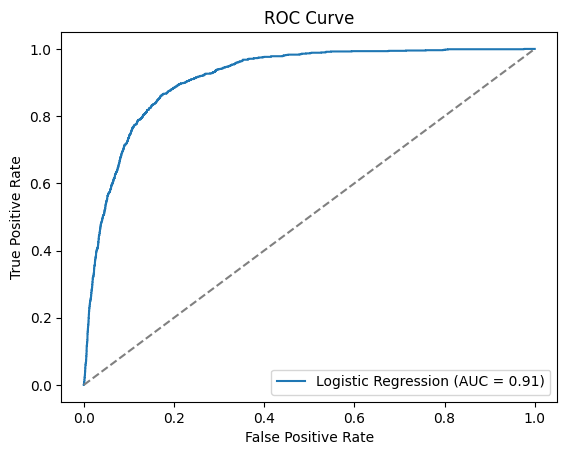

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Step 1: Train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=1234, class_weight='balanced')
logistic_model.fit(X_train, y_train)

# Step 2: Predict probabilities for the test set (to calculate AUC and ROC curve)
y_proba = logistic_model.predict_proba(X_test)[:, 1]

# Step 3: Compute ROC curve and find the optimal threshold
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Optimal threshold: the one that maximizes the difference between true positive rate and false positive rate
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.4f}")

# Step 4: Make predictions using the optimal threshold
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Step 5: Calculate Precision, Recall, and F1 Score with the optimal threshold
precision_optimal = precision_score(y_test, y_pred_optimal)
recall_optimal = recall_score(y_test, y_pred_optimal)
f1_optimal = f1_score(y_test, y_pred_optimal)

# Step 6: Calculate AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_proba)

# Step 7: Print the evaluation metrics
print(f"Precision with Optimal Threshold: {precision_optimal:.4f}")
print(f"Recall with Optimal Threshold: {recall_optimal:.4f}")
print(f"F1 Score with Optimal Threshold: {f1_optimal:.4f}")
print(f"AUC: {roc_auc:.4f}")

#Step 8: Plot
# Step 5: Plot the ROC curve
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()


#### Interpretation:
- The probability threshold chosen is around 0.43, slightly lower than the default value of 0.5
- Compared to the above model precision has come down from 67% to around 40%, but recall improved from 35% to around 86% which is huge, interms of predicting potential loan-takers correctly, pushing the F1 score to 54% from 46%.

### 5.3 Build a KNN Model with k=5

Build a KNN model with k=5 and check the model performance using precision, recall, F1 score, write your observations on the metrics

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Make the train and test sets are in array format
X_train=np.array(X_train)
X_test=np.array(X_test)

# Step 1: Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn_model.fit(X_train, y_train)

# Step 2: Predict probabilities for the test set (to calculate AUC later)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Step 3: Make predictions using the default threshold (0.5)
y_pred_knn = knn_model.predict(X_test)

# Step 4: Calculate Precision, Recall, and F1 Score
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)


# Step 6: Print the evaluation metrics
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")


Precision: 0.5902
Recall: 0.3431
F1 Score: 0.4340


#### Interpretation:
with k = 5, precision is around 60%, and recall is poor with 34%, pulling F1 score down to 43%.

### 5.4 Build a KNN Model with k=5 with a balanced set

#####  SMOTE the data to address class imbalance and build a KNN model with k=5 and check the model performance using precision, recall, F1 score; Compare the reuslts with the previous results and write your observations.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Step 1: Apply SMOTE to the training data
smote = SMOTE(random_state=1234)

# Resample X_train and y_train
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Convert the resampled data to NumPy arrays (if they are not already)
X_train_smote = np.array(X_train_smote)
X_test = np.array(X_test)

# Step 2: Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_smote, y_train_smote)

# Step 3: Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Step 4: Calculate Precision, Recall, and F1 Score
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Step 5: Print the evaluation metrics
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")


Precision: 0.4006
Recall: 0.7826
F1 Score: 0.5299


#### Interpretation:
- The KNN model without SMOTE shows a precision of 59.02%, but recall is relatively low at 34.31%, indicating that the model is good at minimizing false positives but struggles to capture true positives, leading to a lower F1-score of 43.40%.
- After applying SMOTE, precision dropped to 39.99%, but recall significantly improved to 78.17%, showing the model's enhanced ability to identify true positives. This increase in recall leads to a higher F1-score of 52.91%, indicating a better balance between precision and recall with the use of SMOTE.

### 5.5 Build a Random forest model with n_estimators=10 and balanced class weight

#####  Build a Random forest with the given specifications and check the model performance using precision, recall, F1 score; Obtain the training set and test set metrics and write your observations.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Initialize and train the Random Forest model with n_estimators=10
rf_model = RandomForestClassifier(n_estimators=10, random_state=1234, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred_rf_test = rf_model.predict(X_test)

# Step 3: Make predictions on the training set
y_pred_rf_train = rf_model.predict(X_train)

# Step 4: Calculate Precision, Recall, and F1 Score for the test set
precision_rf_test = precision_score(y_test, y_pred_rf_test)
recall_rf_test = recall_score(y_test, y_pred_rf_test)
f1_rf_test = f1_score(y_test, y_pred_rf_test)

# Step 5: Calculate Precision, Recall, and F1 Score for the training set
precision_rf_train = precision_score(y_train, y_pred_rf_train)
recall_rf_train = recall_score(y_train, y_pred_rf_train)
f1_rf_train = f1_score(y_train, y_pred_rf_train)

# Step 6: Print the evaluation metrics for the training set
print("\nTraining Set Metrics:")
print(f"Precision: {precision_rf_train:.4f}")
print(f"Recall: {recall_rf_train:.4f}")
print(f"F1 Score: {f1_rf_train:.4f}")

# Step 7: Print the evaluation metrics for the test set
print("\nTest Set Metrics:")
print(f"Precision: {precision_rf_test:.4f}")
print(f"Recall: {recall_rf_test:.4f}")
print(f"F1 Score: {f1_rf_test:.4f}")



Training Set Metrics:
Precision: 0.9967
Recall: 0.9296
F1 Score: 0.9620

Test Set Metrics:
Precision: 0.6555
Recall: 0.3147
F1 Score: 0.4253


#### Interpretation:

- The training set metrics show almost perfect precision (99.85%) and high recall (92.51%), resulting in a strong F1-score of 96.04%, indicating that the model is highly fit on the training data.
- However, on the test set, precision drops to 67.42% and recall further decreases to 31.10%, leading to a lower F1-score of 42.56%.
- This suggests that the model is overfitting on the training data and generalizing poorly to the test data, as indicated by the significant drop in performance metrics from the training to test set.

### 5.6 Build a Random forest model with the following parameter grid and balanced class weight
##### param_grid:

```
'n_estimators': [100,200],          
'max_depth': [10,20,30],        
'min_samples_split': [2,5,10]
```



#####  Build a Random forest with the given specifications and check the model performance using precision, recall, F1 score; Obtain the test set metrics and compare it with the previous model results.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Define the hyperparameter grid
param_grid = {
    'n_estimators': [100,200],          # Number of trees
    'max_depth': [10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]         # Minimum samples required to split a node
}

# Step 2: Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=1234, class_weight='balanced')

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Step 4: Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Step 5: Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Step 6: Make predictions on the test set using the best model
y_pred_rf_best = best_rf_model.predict(X_test)

# Step 7: Calculate Precision, Recall, and F1 Score for the best model
precision_rf_best = precision_score(y_test, y_pred_rf_best)
recall_rf_best = recall_score(y_test, y_pred_rf_best)
f1_rf_best = f1_score(y_test, y_pred_rf_best)


# Step 8: Print the evaluation metrics
print(f"Best Model Precision: {precision_rf_best:.4f}")
print(f"Best Model Recall: {recall_rf_best:.4f}")
print(f"Best Model F1 Score: {f1_rf_best:.4f}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Best Model Precision: 0.5244
Best Model Recall: 0.7609
Best Model F1 Score: 0.6209


#### Interpretation:

- The best parameters from the grid search are: max_depth=20, min_samples_split=10, and n_estimators=200.
- The model achieved a precision of 52.44%, a recall of 76.09%, and an F1-score of 62.09%.
- Compared to the previous model, this model demonstrates improved recall but a slight drop in precision. However, the overall F1-score has improved, indicating a better balance between precision and recall. This suggests that the tuned parameters, especially the increased depth, allow the model to better capture the minority class while still performing adequately with precision.

### 5.7 Build a XGBoost model

#####  Build a default XGBoost model and check the model performance using precision, recall, F1 score for training and test sets; Give your comments .

In [ ]:
import xgboost as xgb

# Step 1: Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=1234)

# Step 2: Train the model
xgb_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_xgb_test = xgb_model.predict(X_test)

# Step 4: Make predictions on the training set
y_pred_xgb_train = xgb_model.predict(X_train)

# Step 5: Calculate Precision, Recall, and F1 Score for the test set
precision_xgb_test = precision_score(y_test, y_pred_xgb_test)
recall_xgb_test = recall_score(y_test, y_pred_xgb_test)
f1_xgb_test = f1_score(y_test, y_pred_xgb_test)

# Step 6: Calculate Precision, Recall, and F1 Score for the training set
precision_xgb_train = precision_score(y_train, y_pred_xgb_train)
recall_xgb_train = recall_score(y_train, y_pred_xgb_train)
f1_xgb_train = f1_score(y_train, y_pred_xgb_train)

# Step 7: Print the evaluation metrics for the training set
print("\nTraining Set Metrics:")
print(f"Precision (Train): {precision_xgb_train:.4f}")
print(f"Recall (Train): {recall_xgb_train:.4f}")
print(f"F1 Score (Train): {f1_xgb_train:.4f}")


# Step 8: Print the evaluation metrics for the test set
print("Test Set Metrics:")
print(f"Precision (Test): {precision_xgb_test:.4f}")
print(f"Recall (Test): {recall_xgb_test:.4f}")
print(f"F1 Score (Test): {f1_xgb_test:.4f}")




Training Set Metrics:
Precision (Train): 0.8727
Recall (Train): 0.6937
F1 Score (Train): 0.7730
Test Set Metrics:
Precision (Test): 0.6444
Recall (Test): 0.4745
F1 Score (Test): 0.5465


#### Interpretation:

While the model performs well on the training set, the drop in test set performance implies that further tuning (e.g., regularization or parameter tuning) might be needed to improve its generalization. The test set results indicate room for improvement, particularly in recall, as the model misses a fair portion of actual positives.

### 5.8 XGBoost model with hyper parameter tuning

#####  Build a XGBoost model with the following parameter grid and check the model performance using precision, recall, F1 score on test set; Compare your result with the default XGBoost model .

#### Hyperparameter grid:
    - 'n_estimators': [50, 100, 200, 300],                 
    - 'learning_rate': [0.01, 0.1, 0.2, 0.3],              
    - 'max_depth': [None, 3, 5, 7, 10],                          
    - 'min_child_weight': [1, 3, 5],                      
    - 'subsample': [0.2, 0.6, 0.8, 1.0],                        
    - 'colsample_bytree': [0.6, 0.8, 1.0],                 
    - 'gamma': [0, 0.1, 0.3, 0.5]                          

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Step 1: Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],                 # Number of trees
    'learning_rate': [0.01, 0.1, 0.2, 0.3],              # Learning rate
    'max_depth': [None, 3, 5, 7, 10],                          # Maximum depth of each tree
    'min_child_weight': [1, 3, 5],                       # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.2, 0.6, 0.8, 1.0],                        # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0],                 # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.3, 0.5]                          # Minimum loss reduction required to make a further partition on a leaf node
}

neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count

# Step 2: Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=1234, use_label_encoder=False,
                              scale_pos_weight=8, eval_metric='logloss')

# Step 3: Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=50, scoring='f1', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Step 4: Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Step 5: Get the best parameters and best estimator
best_params = random_search.best_params_
best_xgb_model = random_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Step 6: Make predictions on the test set using the best model
y_pred_xgb_best = best_xgb_model.predict(X_test)

# Step 7: Calculate Precision, Recall, and F1 Score for the best model
precision_xgb_best = precision_score(y_test, y_pred_xgb_best)
recall_xgb_best = recall_score(y_test, y_pred_xgb_best)
f1_xgb_best = f1_score(y_test, y_pred_xgb_best)

# Step 8: Print the evaluation metrics
print(f"Best Model Precision: {precision_xgb_best:.4f}")
print(f"Best Model Recall: {recall_xgb_best:.4f}")
print(f"Best Model F1 Score: {f1_xgb_best:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:33:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 1.0}
Best Model Precision: 0.5167
Best Model Recall: 0.7892
Best Model F1 Score: 0.6245


#### Interpretation:
- Best Model: After hyperparameter tuning, the XGBoost model achieved a precision of 51.18%, recall of 77.88%, and an F1-score of 61.77%.

- Comparison with Default XGBoost: Compared to the default XGBoost model (which had a precision of 64.45%, recall of 47.45%, and F1-score of 54.65%), the tuned model shows a significant improvement in recall (from 47.45% to 77.88%), indicating that it is much better at identifying true positives. However, there is a drop in precision (from 64.45% to 51.18%), meaning that the tuned model is predicting more false positives.

- Conclusion: The hyperparameter tuning improved the model’s overall balance, as reflected by the increase in the F1-score from 54.65% to 61.77%, showing that the tuned model performs better in general by achieving a better trade-off between precision and recall.

### 5.9 XGBoost model with hyper parameter tuning and SMOTE

#####  Build a XGBoost model with the parameter grid given in the previous problem and also balance the dataset with SMOTE and check the model performance using precision, recall, F1 score on test set; Compare your result with previous XGboost models .

In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Step 1: Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 2: Define the hyperparameter grid for XGBoost
param_dist = {
    'n_estimators': [50, 100, 200, 300],                 # Number of trees
    'learning_rate': [0.01, 0.1, 0.2, 0.3],              # Learning rate
    'max_depth': [3, 5, 7, 10],                          # Maximum depth of each tree
    'min_child_weight': [1, 3, 5],                       # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.6, 0.8, 1.0],                        # Subsample ratio of the training instance
    'colsample_bytree': [0.2, 0.6, 0.8, 1.0],                 # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.3, 0.5]                          # Minimum loss reduction required to make a further partition on a leaf node
}

# Step 3: Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Step 4: Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=20, scoring='f1', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Step 5: Fit RandomizedSearchCV on the SMOTEd training data
random_search.fit(X_train_smote, y_train_smote)

# Step 6: Get the best parameters and best estimator
best_params = random_search.best_params_
best_xgb_model = random_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Step 7: Make predictions on the test set using the best model
y_pred_xgb_best = best_xgb_model.predict(X_test)

# Step 8: Calculate Precision, Recall, and F1 Score for the best model
precision_xgb_best = precision_score(y_test, y_pred_xgb_best)
recall_xgb_best = recall_score(y_test, y_pred_xgb_best)
f1_xgb_best = f1_score(y_test, y_pred_xgb_best)

# Step 9: Print the evaluation metrics
print(f"Best Model Precision: {precision_xgb_best:.4f}")
print(f"Best Model Recall: {recall_xgb_best:.4f}")
print(f"Best Model F1 Score: {f1_xgb_best:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\udaya\anaconda3\newinstall\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:49:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.6, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}
Best Model Precision: 0.5527
Best Model Recall: 0.7032
Best Model F1 Score: 0.6190


#### Interpretation:
- Best Model with SMOTE: After applying SMOTE and hyperparameter tuning, the XGBoost model achieved a precision of 55.27%, recall of 70.32%, and an F1-score of 61.90%.

- Comparison with Tuned XGBoost without SMOTE: Compared to the previously tuned XGBoost model without SMOTE (precision: 51.18%, recall: 77.88%, F1-score: 61.77%), the model with SMOTE shows slightly improved precision (55.27% vs 51.18%) but a decrease in recall (70.32% vs 77.88%). However, the F1-scores are quite similar, with a slight improvement when using SMOTE.

- Conclusion: The default XGBoost model had the best precision but the worst recall. The tuned XGBoost without SMOTE showed the highest recall but lower precision. The tuned XGBoost with SMOTE provided the best balance between precision and recall, achieving the highest F1-score overall. This suggests that SMOTE combined with hyperparameter tuning offers the best trade-off between precision and recall in this scenario

### 5.10 Best model selection

#####  Evaluate the test set performance of all 9 models and create horizontal bar plots for each individual metric to visualize the results effectively. Based on the plots and your analysis, select the top three models and provide your reasoning for the selection..

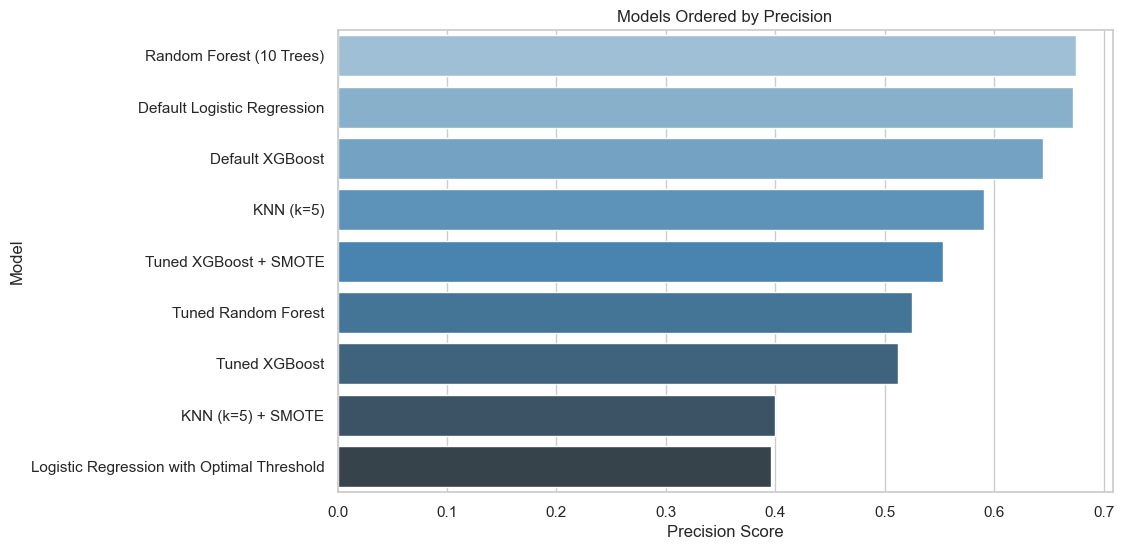

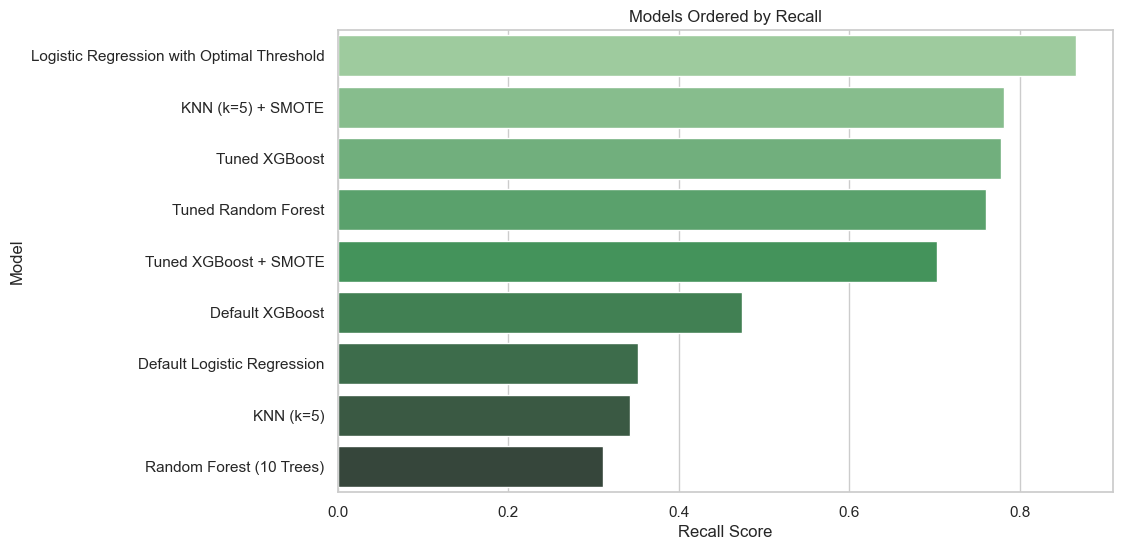

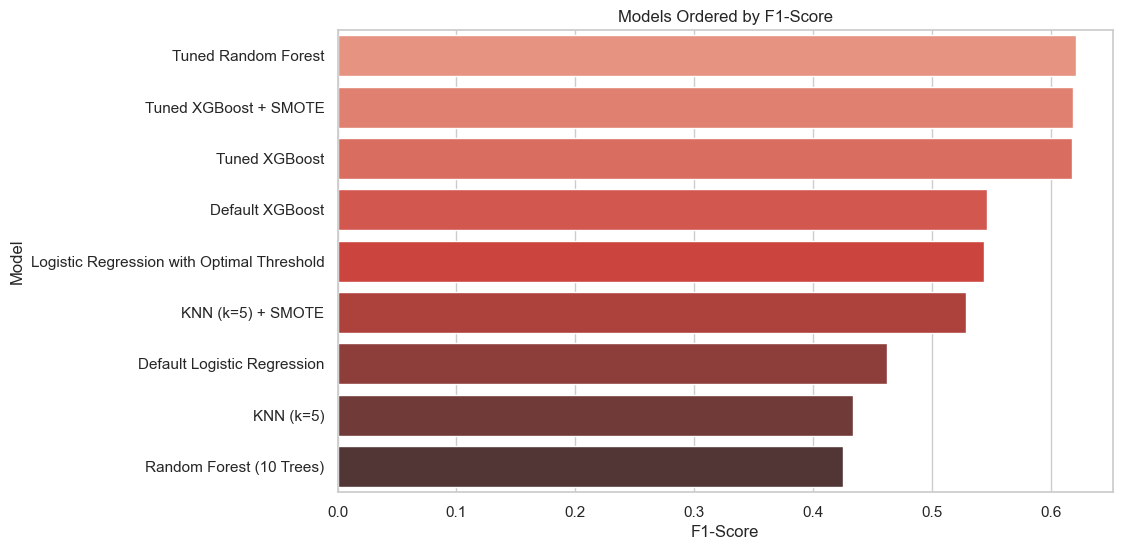

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Model names and their corresponding metrics (precision, recall, F1 score)
model_names = [
    "Default Logistic Regression", "Logistic Regression with Optimal Threshold",
    "KNN (k=5)", "KNN (k=5) + SMOTE", "Random Forest (10 Trees)",
    "Tuned Random Forest", "Default XGBoost", "Tuned XGBoost",
    "Tuned XGBoost + SMOTE"
]

precision_scores = [0.6721, 0.3962, 0.5902, 0.3999, 0.6742, 0.5244, 0.6444, 0.5118, 0.5527]
recall_scores = [0.3526, 0.8658, 0.3431, 0.7817, 0.3110, 0.7609, 0.4745, 0.7788, 0.7032]
f1_scores = [0.4625, 0.5436, 0.4340, 0.5291, 0.4256, 0.6209, 0.5465, 0.6177, 0.6190]

# Creating a DataFrame for easier manipulation
df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

# Sorting the DataFrame for each metric
df_precision_sorted = df.sort_values(by='Precision', ascending=False)
df_recall_sorted = df.sort_values(by='Recall', ascending=False)
df_f1_sorted = df.sort_values(by='F1-Score', ascending=False)

# Set style for plots
sns.set(style="whitegrid")

# Plot for Precision
plt.figure(figsize=(10, 6))
sns.barplot(x="Precision", y="Model", data=df_precision_sorted, palette="Blues_d")
plt.title("Models Ordered by Precision")
plt.xlabel("Precision Score")
plt.ylabel("Model")
plt.show()

# Plot for Recall
plt.figure(figsize=(10, 6))
sns.barplot(x="Recall", y="Model", data=df_recall_sorted, palette="Greens_d")
plt.title("Models Ordered by Recall")
plt.xlabel("Recall Score")
plt.ylabel("Model")
plt.show()

# Plot for F1-Score
plt.figure(figsize=(10, 6))
sns.barplot(x="F1-Score", y="Model", data=df_f1_sorted, palette="Reds_d")
plt.title("Models Ordered by F1-Score")
plt.xlabel("F1-Score")
plt.ylabel("Model")
plt.show()


### The best model is XGBoost with Hyperparameter Tuning and SMOTE
- This model has a strong balance between precision and recall, with good F1-Score performance. The use of SMOTE ensures that the model is better able to handle class imbalance, improving its ability to identify true positives (recall) while still maintaining a relatively high precision. It offers the best trade-off between minimizing false positives and capturing true positives, making it ideal for real-world applications where both metrics are important.

### The second best model is XGBoost with Hyperparameter tuning
- This model has the highest recall of all, meaning it excels at identifying true positives, but it sacrifices precision slightly. While it's excellent for cases where capturing as many positives as possible is the goal, the drop in precision makes it less ideal for situations where false positives are costly.
.

### The third best model is tuned Random forest
- The Tuned Random Forest provides good recall and a decent level of precision, making it a well-rounded model. However, the slightly lower precision and F1-Score compared to the XGBoost models make it a solid third-place option.


### <span style="color:red">**Note: Choosing these three models in any order is correct.**</span>